# Introduction
Visualization helps in communicating data in a way that cannot be seen by looking at raw data.

`matplotlib` is a Python package for plotting graphics. This document aims to provide a brief examples for a non-exhaustive set of plots.

For those needing anything more than what this document can provide, the [official Matplotlib documentation](https://matplotlib.org/stable/gallery/index.html) is excellent (take a look at the many, many things you can do with Matplotlib).

## Notes
Each `pyplot` command makes a change on an initially instantiated figure. Thus, you will incrementally develop your plot.

`pyplot.figure()` allows you to initialize a new plot. `pyplot.show()` displays and closes the current figure.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Line Plots

Take 50 evenly spaced values in $[0, 5)$, and take the $\cos$ and $\sin$ of those values.

In [ ]:
x = np.linspace(0, 5, 50)
y_cos = np.cos(x)
y_sin = np.sin(x)

At each $x$, plot the corresponding $\cos$ or $\sin$ value. The points are connected by a line by default. The different curves are automatically assigned different colors.

Set labels for the axes and title.

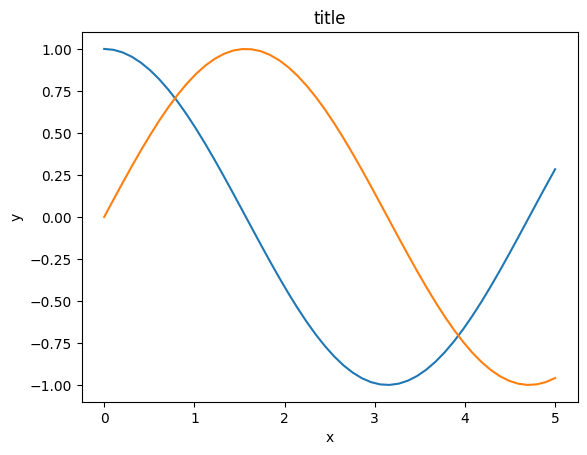

In [ ]:
plt.plot(x, y_cos)
plt.plot(x, y_sin)

plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

# Scatterplots
Unlike line plots, scatterplots do not connect related points with a line.

We can use `pyplot.scatter` for this.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

`make_blobs` returns an `ndarray` of generated points and an `ndarray` of integer labels.

In [ ]:
from sklearn.datasets import make_blobs

coordinates, groups = make_blobs(n_samples=100, n_features=2,
                centers=3)

In [ ]:
coordinates[groups==0,1]

array([-4.60801557, -4.18086342, -3.57008749, -3.39104389, -2.80557991,
       -5.45565707, -6.56303939, -3.75261583, -4.68891807, -3.74667895,
       -4.42053554, -3.03263383, -2.64302343, -3.40959067, -3.8864679 ,
       -3.70320479, -4.20101008, -4.62494965, -2.99382422, -4.60133817,
       -5.39782676, -3.90110737, -2.03144975, -4.12515382, -2.834911  ,
       -2.86243262, -4.09593552, -3.40756922, -3.24485632, -4.1598168 ,
       -4.48441421, -3.80378361, -3.45932113, -3.92061368])

The indexing below works by creating a mask with `groups==k`, where `k` denotes the group label, applying it to `coordinates`, then selecting $x_0$ and $x_1$ from the selected coordinates.

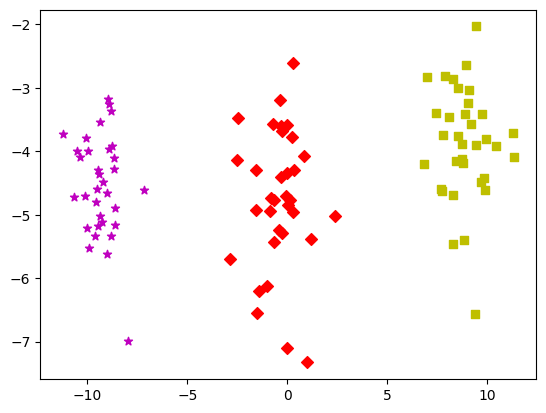

In [ ]:
plt.scatter(x = coordinates[groups==0,0],
            y = coordinates[groups==0,1],
            c = 'y', marker = 's') # yellow square
plt.scatter(x = coordinates[groups==1,0],
            y = coordinates[groups==1,1],
            c = 'm', marker = '*') # magenta stars
plt.scatter(x = coordinates[groups==2,0],
            y = coordinates[groups==2,1],
            c = 'r', marker = 'D') # red diamonds

plt.show()

# Histograms
Histograms represent the distribution of a variable.

We can use `pyplot.hist` for plotting histograms.

- [`pyplot.hist` docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Create two normal distributions: one centered at `0` and another centered at `3`.

In [ ]:
hist_x = np.random.normal(loc=0.0, scale=1.0, size=500)
hist_z = np.random.normal(loc=3.0, scale=1.0, size=500)

Below, the blue distribution is "on top" of the red distribution.

`np.column_stack` stacks 1D arrays as columns into a 2D array (i.e. $A=\begin{bmatrix}\mathbf{x}_0&\mathbf{x}_1\end{bmatrix}$, where $\mathbf{x}_0,\mathbf{x}_1$ are column vectors).

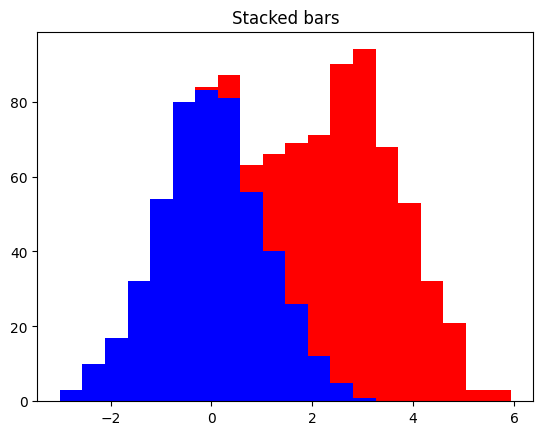

In [ ]:
plt.title("Stacked bars")
plt.hist(np.column_stack((hist_x, hist_z)),
         bins=20,
         histtype='bar',
         color = ['b','r'],
         stacked=True)

plt.show()

Unfilled bar

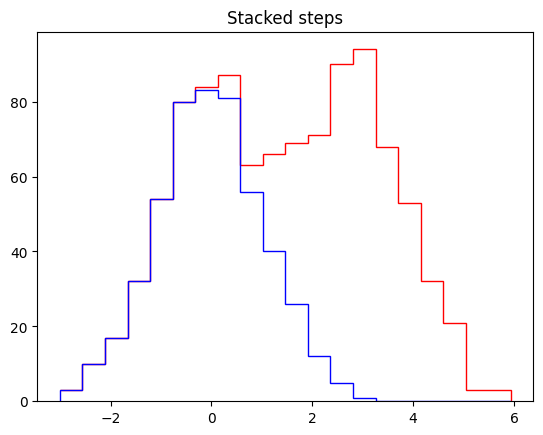

In [ ]:
plt.title("Stacked steps")
plt.hist(np.column_stack((hist_x, hist_z)),
         bins=20,
         histtype='step',
         color = ['b','r'],
         stacked=True)

plt.show()

# Bar Graphs
Bar graphs are useful for comparing quantities in different categories.

We can use `pyplot.bar` and `pyplot.barh` for plotting bar graphs.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

We will present the mean and standard deviation for the four variables of the Iris dataset.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

average = np.mean(iris.data, axis=0)
std = np.std(iris.data, axis=0)
range_ = range(np.shape(iris.data)[1])

We can present the data with horizontal bars.

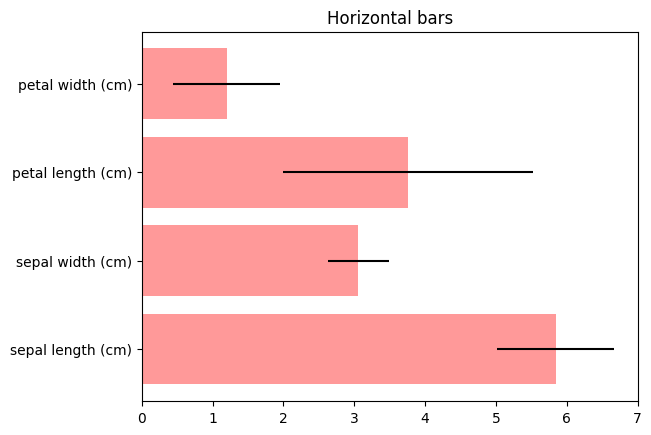

In [ ]:
plt.title('Horizontal bars')
plt.barh(range_, average, color = "r",
         xerr = std, alpha = 0.4, align = "center")
plt.yticks(range_, iris.feature_names)

plt.show()

We can also present the data with vertical bars.

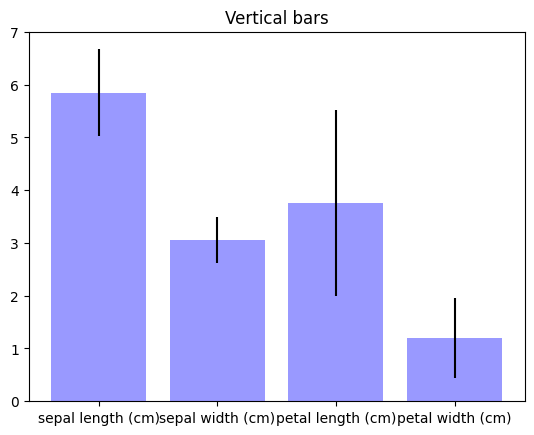

In [ ]:
plt.title('Vertical bars')
plt.bar(range_, average, color="b",
        yerr=std, alpha=0.4, align="center")
plt.xticks(range_, iris.feature_names)

plt.show()

# Box Plots
We can use `pyplot.boxplot` to plot box plots.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html


Recall the elements of a box plot:
<div>
<img src="https://i0.wp.com/quantgirl.blog/wp-content/uploads/2019/02/box_anatomy-3-e1549228924225.png?resize=717%2C705&ssl=1" width="500"/>
</div>

In [ ]:
box_data_1 = np.random.normal(100, 10, 200)
box_data_2 = np.random.normal(80, 30, 200)
box_data_3 = np.random.normal(90, 20, 200)

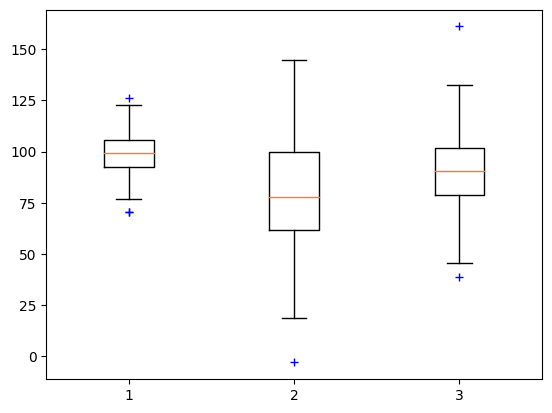

In [ ]:
bp = plt.boxplot(np.column_stack([box_data_1, box_data_2, box_data_3]),
                 sym = 'b+')

# Heatmaps
A heatmap is a visualization where values of a matrix are represented as colors. A heatmap is useful for visualizing the concentration of values between two dimensions of a matrix.

We can use `pyplot.hist2d` to plot heatmaps.

- [`pyplot.hist2d` docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html)

Generate some test data.

In [ ]:
heat_x = np.random.randn(10000)
heat_y = np.random.randn(10000)

We need to manually square our figure.

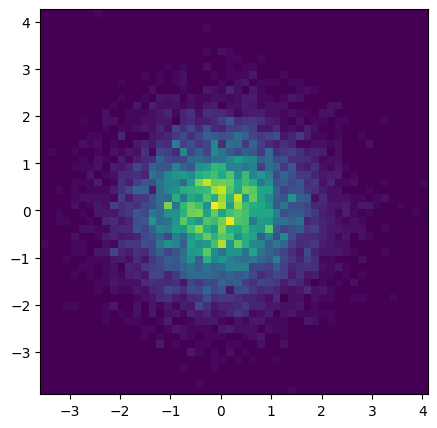

In [ ]:
plt.figure(figsize=(5, 5))
plt.hist2d(heat_x, heat_y, bins=50)

plt.show()

# Images
We can use `pyplot.imshow` to plot images.

- [`pyplot.imshow` docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

Get 9x9 grayscale images of decimal digits.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

Plot the numbers 1-9, set the x and y ticks to be spaced 3 pixels apart, and set a grid for each figure.

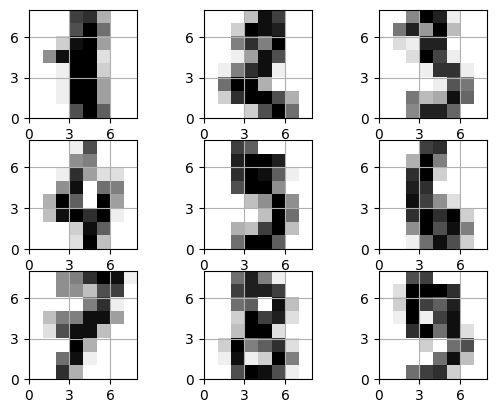

In [ ]:
for i in range(1,10):
    fig = plt.subplot(3, 3, i)
    fig.imshow(digits.images[i],
                cmap='binary',
                interpolation='none',
                extent=[0,8,0,8])
    fig.set_xticks(np.arange(0, 9, 3))
    fig.set_yticks(np.arange(0, 9, 3))
    fig.grid()

plt.show()

We can also use `pyplot.imshow` to plot matrices.

`np.histogram2d` takes two arrays and returns the 2D histogram of `x` and `y` and the positions of the edges of the bins for the x and y axis.

In [ ]:
heat_x = np.random.randn(10000)
heat_y = np.random.randn(10000)

heatmap, xedges, yedges = np.histogram2d(heat_x, heat_y, bins=50)

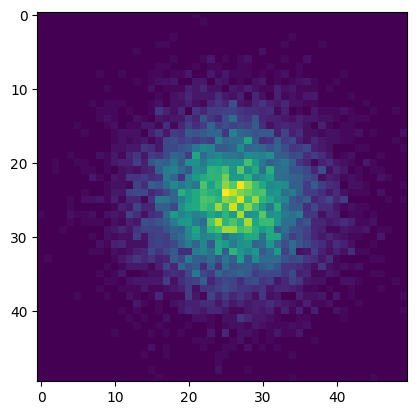

In [ ]:
plt.imshow(heatmap)
plt.show()

# Surface Plots
We can use the keyword `projection = '3d'` for a subplot and `ax.plot_surface` to plot surfaces in 3 dimensions.

https://matplotlib.org/stable/gallery/mplot3d/surface3d_2.html

Compute $z=\sin(\sqrt{x^2,y^2})$ for:
- $x_i=y_i=l+i*s$
- $i=0,1,\ldots,\frac{(r-l)}{s}$ (index)
- $l=-5$ (left)
- $r=5$ (right)
- $s=1/4$ (step size)

In [ ]:
sp_x = np.arange(-5, 5, 0.25)
sp_y = np.arange(-5, 5, 0.25)
sp_x, sp_y = np.meshgrid(sp_x, sp_y)

R = np.sqrt(sp_x**2 + sp_y**2)
sp_z = np.sin(R)

When plotting the surface, define a colormap (`cm`) so that the colors go from cool to warm as $z$ increases.

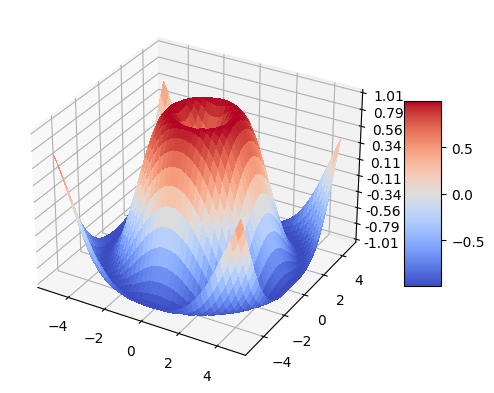

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Plot the surface.
surf = ax.plot_surface(sp_x, sp_y, sp_z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Stylize Plot

You have complete control over your plots. See the below chart for reference.

## Anatomy of a Figure Reference
<div>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png" width="500"/>
</div>

## Controlling the Plot
You can make changes to your plot in a few different ways. These changes can either be made to all `matplotlib` objects or to one at a time.

### Using rcParams
We can change the default settings, or default runtime configuration (rc). All such settings are stored in `matplotlib.rcParams` which is global to the `matplotlib` package.

Here is a full list of configurable rcParams: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams.

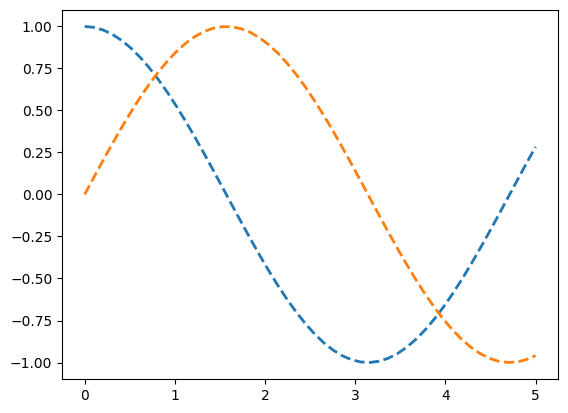

In [ ]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(x, y_cos)
plt.plot(x, y_sin)

plt.show()

# revert changes
plt.rcParams.update(plt.rcParamsDefault)

### Using Keyword Arguments
You can set settings using keyword arguments while creating the plot.

You can easily check the keyword arguments of a plotting function by reading the documentation.

Checking the [documentation for `pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), we see that the function signature is as follows:
```python
matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
```

While it doesn't seem particularly revealing, scrolling down shows a complete list of `Parameters`, `Returns`, and `Other Parameters`. We can see that `**kwargs` are `Line2D` properties. One such property is `linewidth`.

Here, we change the `linewidth` from its default value of `1.0` to `4.0`.

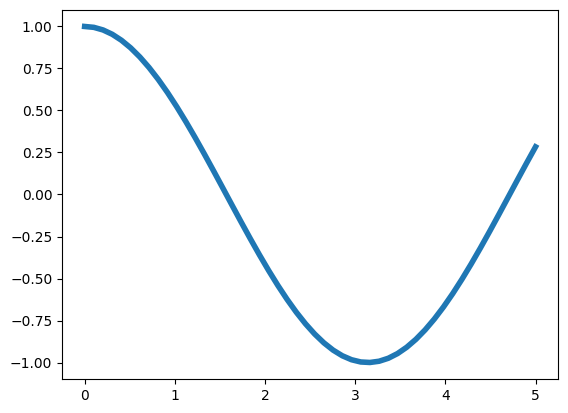

In [ ]:
plt.plot(x, y_cos, linewidth = 4.0)

plt.show()

### Using Setter Methods
In the case that we would like to change properties of an object after its been defined, we can use setter methods.

To do so, we need to save the return values of our plot method (`pyplot.plot`, here), which are a list of `Line2D` objects.

A `List2D` object has a number of setter methods, which can all be checked in [their documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

One such method is `set_linestyle`.

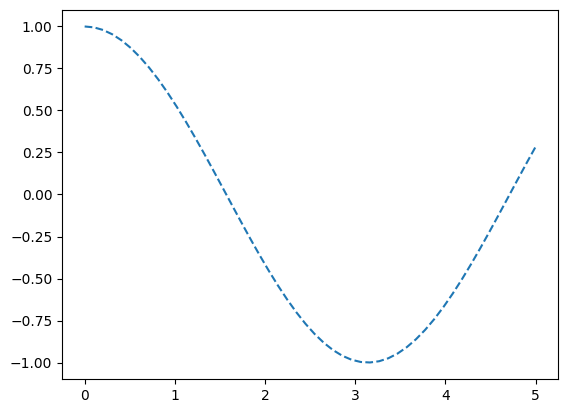

In [ ]:
line, = plt.plot(x, y_cos)
line.set_linestyle('--') # Setting dashed lines

plt.show()

### Using setp
`pyplot.setp` can be used to set multiple properties at once.

Below, we use it to set the color and width of the line after it has been defined.

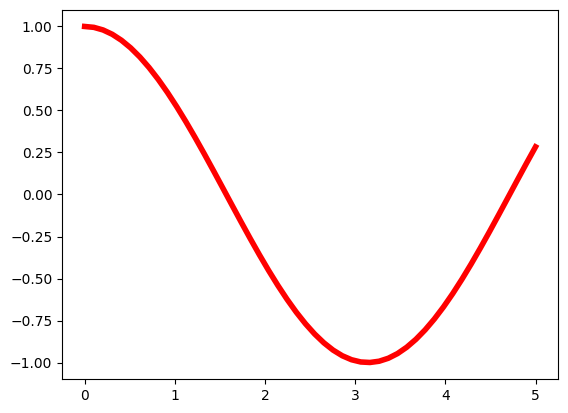

In [ ]:
line, = plt.plot(x, y_cos)
plt.setp(line, color='r', linewidth=4.0)

plt.show()

## Style Sheets
Style sheets are a set of predefined plot characteristics that you can use across different plots.

All style sheets can be seen here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Apply the style with `pyplot.style.use`.

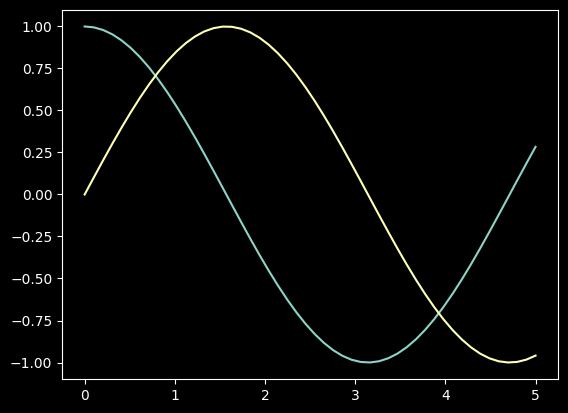

In [ ]:
plt.style.use('dark_background')

# using previously defined values
plt.plot(x, y_cos)
plt.plot(x, y_sin)

plt.show()

# revert style
plt.rcParams.update(plt.rcParamsDefault)

## Subplots
Using `subplot(nrows, ncols, index, **kwargs)`

### Horizontally split

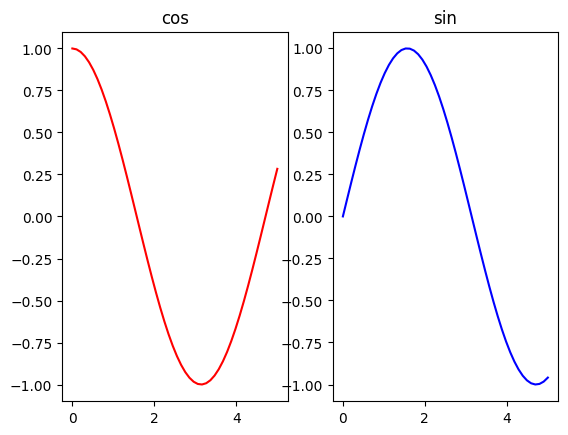

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(x, y_cos, 'r') # set color of plot
plt.title('cos') # title the recent subplot

# defines 1 row 2 column panel, activates figure 2
plt.subplot(1, 2, 2)
plt.plot(x, y_sin, 'b')

plt.title('sin')
plt.show()

### Vertically Split

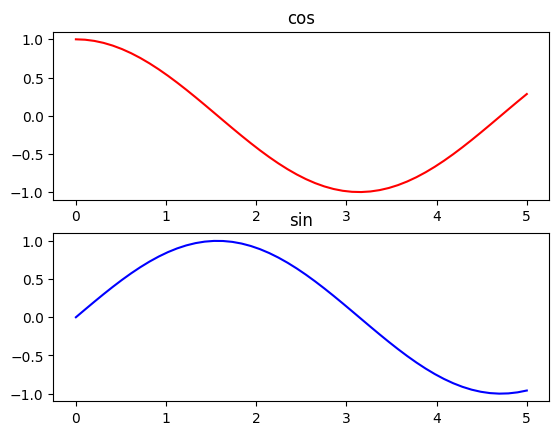

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(x, y_cos, 'r')
plt.title('cos')

plt.subplot(2, 1, 2)
plt.plot(x, y_sin, 'b')

plt.title('sin')
plt.show()

## Figure Size
You can use `plt.figure(figsize=(width, height)` to adjust the figure size to your desired size.

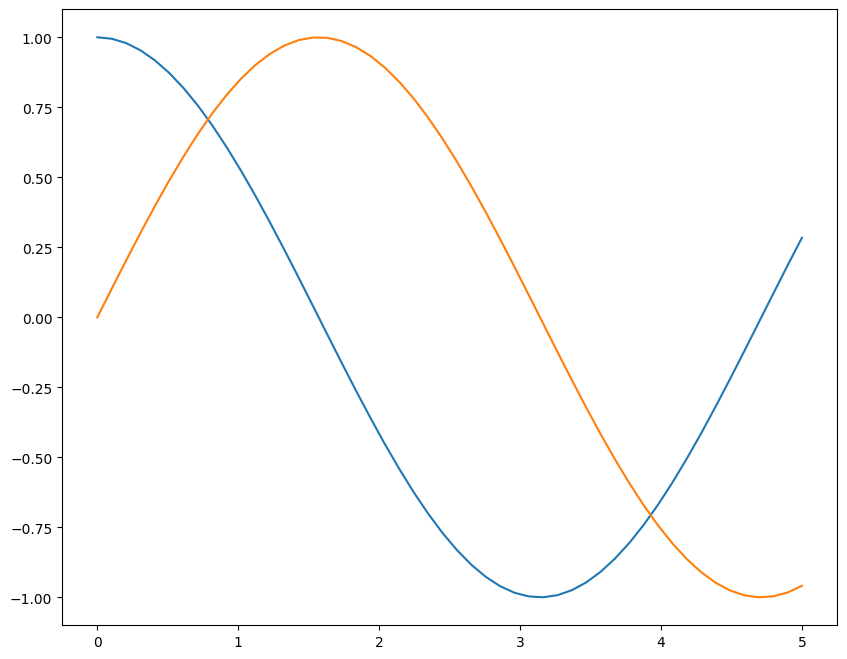

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(x, y_cos)
plt.plot(x, y_sin)

plt.show()

## Figure Title, Axis Labels, and Legend

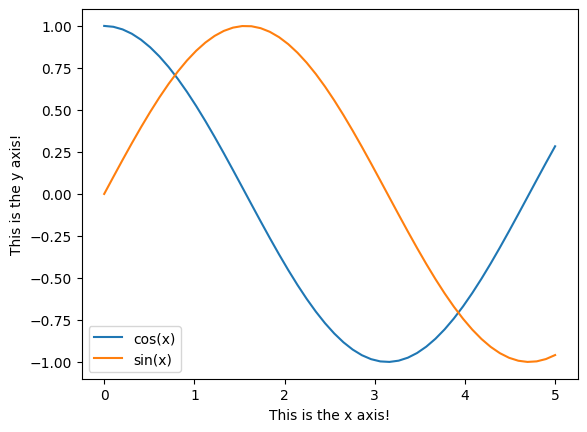

In [ ]:
plt.plot(x, y_cos, label = 'cos(x)')
plt.plot(x, y_sin, label = 'sin(x)')

plt.xlabel('This is the x axis!')
plt.ylabel('This is the y axis!')

plt.legend(loc='lower left')

plt.show()

## Colors, Line Styles, and Markers
- [All colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- [All Line Styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
- [All Markers](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)

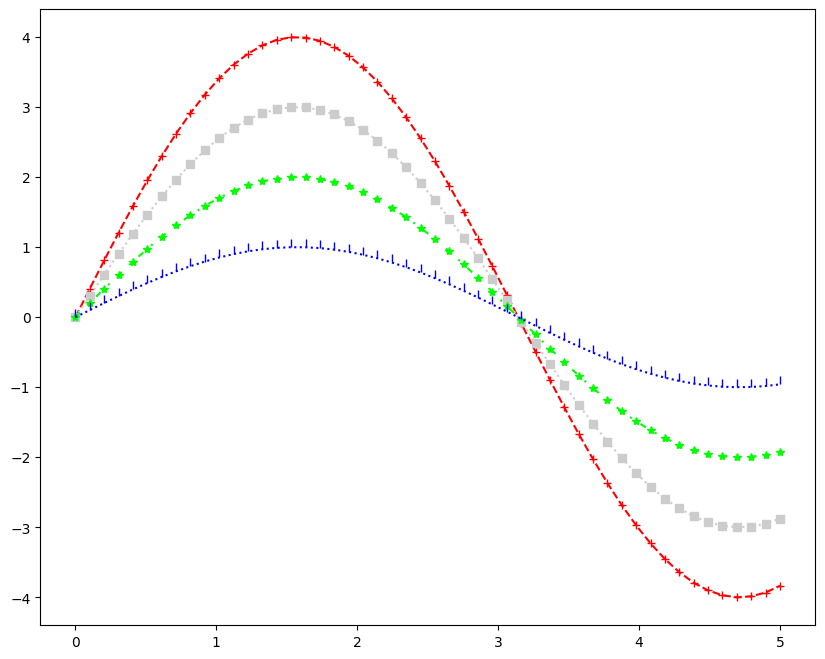

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(x, y_sin * 4, color = 'red',     ls = 'dashed',          marker = '+')
plt.plot(x, y_sin * 3, color = '0.8',     ls = ':',               marker = 's')
plt.plot(x, y_sin * 2, color = '#00FF00', ls = (0, (3, 5, 1, 5)), marker = '*')
plt.plot(x, y_sin,     color = 'b',       ls = 'dotted',          marker = 2)

plt.show()

## Text and Annotation
We can add text to a plot using `pyplot.text`.

We can add annotations using `pyplot.annotate`.

- [`pyplot.text` docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)
- [`pyplot.annotate` docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)

In [ ]:
plt.plot(x, y_cos)
plt.plot(x, y_sin)

plt.text(0, 0, 'This text is added at the plot where x=0, y=0', color='r')

plt.annotate('This is the Peak', # string to annotate
             xy = (1.57, 1),     # the position of x and y
             xytext = (3, -0.5), # the xy position to add the texts
             bbox = {'boxstyle': 'round'},
             arrowprops = dict(arrowstyle = 'fancy',
                               connectionstyle='angle3, angleA=0, angleB=-90'))

plt.show()

# References
1. S. Madhavan. (2015). Mastering Python for Data Science. Available: https://github.com/AmandaZou/Data-Science-books-/blob/master/Mastering%20Python%20for%20Data%20Science.pdf
2. A. Boschetti, L. Massaron. Python Data Science Essentials. Available: https://aaronyeo.org/books_/Data_Science/Python/Python%20Data%20Science%20Essentials.pdf
3. J. Nyandwi. Data Visualizations with Matplotlib. Available: https://github.com/Nyandwi/machine_learning_complete/blob/8aabb071866027dd5c83de6de0c82a17f2ebe79e/3_data_visualization/1_data_visualizations_with_matplotlib.ipynb
4. https://matplotlib.org/stable/api/index.html